In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676 entries, 0 to 4675
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   4676 non-null   int64 
 1   avg_time_to_collect_invoice  4676 non-null   int64 
 2   avg_bill_methods             4676 non-null   object
 3   deptor_volume_handled        4676 non-null   int64 
 4   collect_sum                  4676 non-null   int64 
 5   bill_amount_collected        4676 non-null   int64 
 6   total_actual                 4676 non-null   int64 
 7   total_cost                   4676 non-null   int64 
 8   number_of_success            4676 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 328.9+ KB


In [3]:
df["avg_bill_methods"] = df["avg_bill_methods"].astype("category")
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,avg_time_to_collect_invoice,avg_bill_methods,deptor_volume_handled,collect_sum,bill_amount_collected,total_actual,total_cost,number_of_success
0,7,surat panggilan,28,26,33500000,138000000,1482417,12
1,10,surat panggilan,22,6,78500000,224000000,508306,20
2,7,surat panggilan,20,14,10500000,26500000,938816,23
3,19,datang ke tempat,45,27,524000000,700500000,215880488,69
4,20,datang ke tempat,35,24,116000000,542500000,208308342,68


In [4]:
# Preprocessing untuk fitur kategori
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numeric_features = [i for i in df.columns if df[i].dtype != "category" and i != "total_cost"]
categorical_features= [i for i in df.columns if df[i].dtype == "category" and i != "total_cost"]
# Gabungkan transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [5]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [6]:
X = df.drop(["total_cost"], axis=1)
y = df["total_cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
y_train = StandardScaler().fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = StandardScaler().fit_transform(y_test.to_numpy().reshape(-1, 1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3740, 7), (936, 7), (3740, 1), (936, 1))

In [7]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['avg_time_to_collect_invoice',
                                                   'deptor_volume_handled',
                                                   'collect_sum',
                                                   'bill_amount_collected',
                                                   'total_actual',
                                                   'number_of_success']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['avg_bill_methods'])])),
                ('regressor', LinearRegression())])

In [8]:
model = pipeline["regressor"]
y_pred = pipeline.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 0.33
      Mean Absolute Error : 0.39
      Mean Absolute Percentage Error : 1.82
      Root Mean Squared Error : 1.82
      R_Squared : 0.67
      


In [10]:
y_pred.reshape(-1)

array([-5.59627502e-01, -8.06078419e-01, -3.32231275e-01, -5.75623212e-01,
       -7.24933264e-01, -8.21585435e-01, -7.00939945e-01, -8.33871086e-01,
       -7.70784882e-01, -3.14406491e-01, -1.01141884e+00,  7.68206694e-01,
        1.10738514e+00,  4.17050906e-01, -8.09160709e-01, -7.80462688e-01,
        9.65695084e-01, -8.20448436e-01, -1.03067163e+00,  8.35636861e-01,
        1.00612996e+00,  8.01229083e-01,  8.29546029e-01, -3.27372924e-01,
       -8.89469904e-01, -8.45085695e-01, -7.72940642e-01,  1.41759395e+00,
        4.38446703e-01, -7.79711209e-01,  1.22304874e+00,  5.32404829e-01,
       -6.67707160e-01, -4.54411055e-01, -7.30082401e-01, -8.83824808e-01,
        6.13552267e-01, -8.96702715e-01,  6.43956254e-01,  1.21243809e+00,
        1.01479146e+00, -7.92046939e-01, -7.45091798e-01, -7.56861489e-01,
       -9.55732455e-01, -8.15708723e-01, -2.54736045e-01, -3.86040266e-01,
       -5.97555697e-01, -4.00739948e-01, -4.24190333e-01, -7.16324772e-01,
       -4.56040693e-01, -

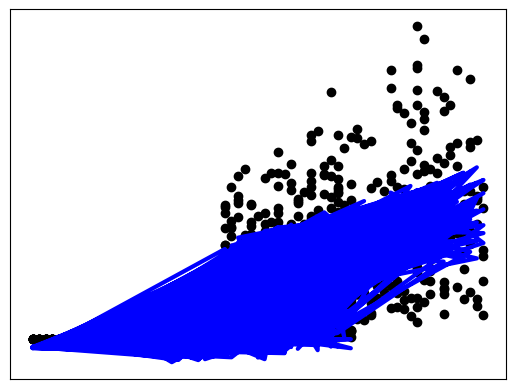

In [11]:
plt.scatter(X_test["deptor_volume_handled"], y_test, color="black")
plt.plot(X_test["deptor_volume_handled"], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()